**Install Library yang diperlukan**


In [ ]:
!pip install pandas # package manager python install luibrary pandas
!pip install tweet-preprocessor
!pip install requests bs4

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update #Perintah untuk update repository linux
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y
!sudo npm install
!sudo npm playwright install
!sudo npm install @playwright/test
!sudo npx playwright install


!node -v

!pip install google-play-scraper
!pip install Sastrawi
#!pip install googletrans==3.1.0a0
!pip install tensorflow
!pip install transformers
!pip install -q -U keras-tuner
!pip install transformers torch nltk
!pip install wordcloud
!pip install openai

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,994 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,591 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,125 kB]
Hit:13 https://ppa.launc

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library yang dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import preprocessor as p
import requests
import urllib
import nltk
import os
import openai
import collections
import tensorflow as tf
from google_play_scraper import app
from google_play_scraper import Sort, reviews_all
from bs4 import BeautifulSoup
from textblob import TextBlob
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
#from googletrans import Translator
from __future__ import division, print_function
from gensim import models
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import regularizers, backend as K
from tensorflow.keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch
from transformers import AutoTokenizer, TFAutoModel
from keras_tuner.tuners import BayesianOptimization
import IPython
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**Crawling Twitter**

In [ ]:
filename = 'data twitter #aplikasisolodestination.csv' #penamaan saving file
search_keyword = '#aplikasisolodestination' #kata kunci untuk crawling data di pencarian twitter
limit = 500 #jumlah maksimal data yang diambil

!npx --yes tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" -l {limit} --token ""

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼npm warn deprecated rimraf@3.0.2: Rimraf versions prior to v4 are no longer supported
⠼npm warn deprecated inflight@1.0.6: This module is not supported, and leaks memory. Do not use it. Check out lru-cache if you want a good and tested way to coalesce async requests by a key value, which is much more comprehensive and powerful.
⠴npm warn deprecated glob@7.2.3: Glob versions prior to v9 are no longer supported
⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.

? What's your Twitter auth token? › 78? What's your Twitter auth token? ›

In [ ]:
file_path = "/content/drive/MyDrive/Bismillah TA/raw data twitter.csv" #file path untuk data twitter yang sudah di crawling
twitter_1 = pd.read_csv(file_path, encoding='latin1')  #membaca file path dalam bentuk data frame
display(twitter_1) #display data frame hasil crawling twitter

,full_text
0,Holaaa #SobatMonpers ???? Radio Komunitas Ana...
1,@gibran_tweet Tapi aplikasi destination solo n...
2,Teknologi informasi (IT) kini kian mengakrabi ...
3,"@gerri_ardian @gibran_tweet Foto aja mas, lapo..."
4,@cremecrmllatte @gibran_tweet Laporkan saja di...
...,...
325,Surakarta Kenalkan Aplikasi Solo Destination h...
326,http://t.co/OPjToD2xIU Surakarta Kenalkan Apli...
327,#NEWS: Surakarta Kenalkan Aplikasi Solo Destin...
328,Surakarta Kenalkan Aplikasi Solo Destination h...


In [ ]:
df_twitter_1 = twitter_1[['full_text']] #membuat fungsi agar data bisa digabungkan dengan sumber lain
df_twitter_1

,full_text
0,Holaaa #SobatMonpers ???? Radio Komunitas Ana...
1,@gibran_tweet Tapi aplikasi destination solo n...
2,Teknologi informasi (IT) kini kian mengakrabi ...
3,"@gerri_ardian @gibran_tweet Foto aja mas, lapo..."
4,@cremecrmllatte @gibran_tweet Laporkan saja di...
...,...
325,Surakarta Kenalkan Aplikasi Solo Destination h...
326,http://t.co/OPjToD2xIU Surakarta Kenalkan Apli...
327,#NEWS: Surakarta Kenalkan Aplikasi Solo Destin...
328,Surakarta Kenalkan Aplikasi Solo Destination h...


In [ ]:
file_path = "/content/drive/MyDrive/Bismillah TA/raw_data_twitter_ (1).csv" #file path untuk data twitter yang sudah di crawling
twitter_2 = pd.read_csv(file_path, encoding='latin1')  #membaca file path dalam bentuk data frame
display(twitter_2)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1511912305344524288,Thu Apr 07 03:42:38 +0000 2022,150,Kota Solo memiliki Aplikasi Solo Destination y...,1511912305344524288,https://pbs.twimg.com/ext_tw_video_thumb/15119...,NaN,in,NaN,2,2,22,https://twitter.com/gibran_tweet/status/151191...,1356478042797797377,gibran_tweet
1,1067673023379951616,Wed Nov 28 06:54:19 +0000 2018,0,Aplikasi Solo Destination Versi iOS Dukung Pro...,1067673023379951616,https://pbs.twimg.com/media/DtEi9OGU8AAudyb.jpg,NaN,in,"Denpasar Selatan, Indonesia",0,0,0,https://twitter.com/banglintas/status/10676730...,971732639886360576,banglintas
2,1005330569176276992,Sat Jun 09 06:07:40 +0000 2018,0,Memanjakan Wisata Indonesia Solo meluncurkan A...,1005330569176276992,https://pbs.twimg.com/media/DfOm0xWUcAIdaJB.jpg,NaN,in,Indonesia,0,0,0,https://twitter.com/epicnesia/status/100533056...,2365918238,epicnesia
3,1670681633555640320,Mon Jun 19 06:35:15 +0000 2023,0,Teknologi informasi (IT) kini kian mengakrabi ...,1670681633555640320,https://pbs.twimg.com/media/Fy90AolaAAAH-4D.jpg,NaN,in,NaN,1,0,0,https://twitter.com/roadsafetycult/status/1670...,1484320449752604678,roadsafetycult
4,1006458622627307520,Tue Jun 12 13:45:07 +0000 2018,5,@InfoTwitwor bisa juga download Aplikasi di An...,1006532854824820736,https://pbs.twimg.com/media/DffsSYCVMAADLk3.jpg,kujisa,in,NaN,0,1,5,https://twitter.com/kujisa/status/100653285482...,2319301809,kujisa
5,1784266983309271229,Sun Apr 28 10:11:00 +0000 2024,0,@EvolvedNaanX @UNSfess_ ..terkait pertanyaan s...,1784525715733696931,https://pbs.twimg.com/media/GMPorPDbYAAYsD7.jpg,oholysprite,in,"TAG-SOC, FULL AC , TARIP BIASA",0,0,0,https://twitter.com/oholysprite/status/1784525...,255917395,oholysprite
6,1394835730216603649,Wed May 19 02:02:07 +0000 2021,0,Salam Pramuka!! Salam Pramuka Scout Triska Pra...,1394835730216603649,https://pbs.twimg.com/media/E1tzs33VkAMJCCO.jpg,NaN,in,"Surakarta, Jawa Tengah",0,0,0,https://twitter.com/disdiksurakarta/status/139...,1266189054040670208,disdiksurakarta
7,1425624772163997699,Thu Aug 12 01:06:47 +0000 2021,1,Ayo Warga Solo segera bayar PBB Anda mulai tgl...,1425624772163997699,https://pbs.twimg.com/media/E8jVrZjVgAMoz6t.jpg,NaN,in,"Surakarta, Indonesia",0,1,1,https://twitter.com/bppkadsurakarta/status/142...,1349557227649056771,bppkadsurakarta
8,1702245550983385589,Thu Sep 14 08:59:00 +0000 2023,6,Hai Lur! Di Solo Car Free Day kamu bisa menemu...,1702245550983385589,https://pbs.twimg.com/ext_tw_video_thumb/17022...,NaN,in,NaN,0,1,1,https://twitter.com/PEMKOT_SOLO/status/1702245...,3347793914,PEMKOT_SOLO
9,1643435571149430789,Wed Apr 05 02:09:08 +0000 2023,6,Kota Solo punya kanal aduan yang super keren n...,1643435571149430789,https://pbs.twimg.com/media/Fs6musDaMAAU9Lz.jpg,NaN,in,NaN,0,1,2,https://twitter.com/PEMKOT_SOLO/status/1643435...,3347793914,PEMKOT_SOLO


In [ ]:
df_twitter_2 = twitter_2[['full_text']]
df_twitter_2

,full_text
0,Kota Solo memiliki Aplikasi Solo Destination y...
1,Aplikasi Solo Destination Versi iOS Dukung Pro...
2,Memanjakan Wisata Indonesia Solo meluncurkan A...
3,Teknologi informasi (IT) kini kian mengakrabi ...
4,@InfoTwitwor bisa juga download Aplikasi di An...
5,@EvolvedNaanX @UNSfess_ ..terkait pertanyaan s...
6,Salam Pramuka!! Salam Pramuka Scout Triska Pra...
7,Ayo Warga Solo segera bayar PBB Anda mulai tgl...
8,Hai Lur! Di Solo Car Free Day kamu bisa menemu...
9,Kota Solo punya kanal aduan yang super keren n...


In [ ]:
file_path = "/content/drive/MyDrive/Bismillah TA (1)/Data Twitter/data__twitter_apk_solo_destination.csv" #file path untuk data twitter yang sudah di crawling
twitter_3 = pd.read_csv(file_path, encoding='latin1')  #membaca file path dalam bentuk data frame
display(twitter_3)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.662679e+18,Sun May 28 12:51:59 +0000 2023,3,@txtfromsoc @PEMKOT_SOLO Aku tak melu min..gon...,1.662804e+18,https://pbs.twimg.com/media/FxN3VS5aYAAhcnR.jpg,txtfromsoc,in,Indonesia,1,3,0,https://x.com/M_KAEL/status/1662803905179455492,8.182322e+07,M_KAEL
1,1.798743e+18,Thu Jun 06 15:45:48 +0000 2024,7,Any suggestions for safe travel destinations f...,1.798743e+18,NaN,NaN,en,NaN,0,8,0,https://x.com/apkcodes/status/1798743100749422853,8.638276e+17,apkcodes
2,1.784267e+18,Tue May 28 15:00:10 +0000 2024,0,@oholysprite @EvolvedNaanX Min tntg apk Solo D...,1.795470e+18,NaN,oholysprite,in,NaN,0,1,0,https://x.com/arat72054/status/179547012376951...,1.790602e+18,arat72054
3,1.223037e+18,Fri Jan 31 00:15:16 +0000 2020,1,Haiii guyssss.... Sangat amat memohon bantuan ...,1.223037e+18,NaN,NaN,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/SoloThok/status/1223036990670753792,1.376369e+09,SoloThok


In [ ]:
df_twitter_3 = twitter_3[['full_text']]
df_twitter_3

,full_text
0,@txtfromsoc @PEMKOT_SOLO Aku tak melu min..gon...
1,Any suggestions for safe travel destinations f...
2,@oholysprite @EvolvedNaanX Min tntg apk Solo D...
3,Haiii guyssss.... Sangat amat memohon bantuan ...


In [ ]:
file_path = "/content/drive/MyDrive/Bismillah TA (1)/Data Twitter/data_twitter_aplikasi_destination (1).csv" #file path untuk data twitter yang sudah di crawling
twitter_4 = pd.read_csv(file_path, encoding='latin1')  #membaca file path dalam bentuk data frame
display(twitter_4)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.511912e+18,Thu Apr 07 03:42:38 +0000 2022,150,Kota Solo memiliki Aplikasi Solo Destination y...,1.511912e+18,https://pbs.twimg.com/ext_tw_video_thumb/15119...,NaN,in,NaN,2,2,22,https://x.com/gibran_tweet/status/151191230534...,1.356478e+18,gibran_tweet
1,1.805883e+18,Wed Jun 26 08:36:28 +0000 2024,0,Laporkan segala gangguan kamtibmas atau ganggu...,1.805883e+18,https://pbs.twimg.com/ext_tw_video_thumb/18058...,NaN,in,NaN,0,0,0,https://x.com/DikyasaSurakar1/status/180588281...,1.551498e+18,DikyasaSurakar1
2,1.670682e+18,Mon Jun 19 06:35:15 +0000 2023,0,Teknologi informasi (IT) kini kian mengakrabi ...,1.670682e+18,https://pbs.twimg.com/media/Fy90AolaAAAH-4D.jpg,NaN,in,NaN,1,0,0,https://x.com/roadsafetycult/status/1670681633...,1.484320e+18,roadsafetycult
3,1.702246e+18,Thu Sep 14 08:59:00 +0000 2023,6,Hai Lur! Di Solo Car Free Day kamu bisa menemu...,1.702246e+18,https://pbs.twimg.com/ext_tw_video_thumb/17022...,NaN,in,NaN,0,1,1,https://x.com/PEMKOT_SOLO/status/1702245550983...,3.347794e+09,PEMKOT_SOLO
4,1.643436e+18,Wed Apr 05 02:09:08 +0000 2023,6,Kota Solo punya kanal aduan yang super keren n...,1.643436e+18,https://pbs.twimg.com/media/Fs6musDaMAAU9Lz.jpg,NaN,in,NaN,0,1,2,https://x.com/PEMKOT_SOLO/status/1643435571149...,3.347794e+09,PEMKOT_SOLO
5,1.643346e+18,Wed Apr 05 16:45:43 +0000 2023,0,Oiya pas di halte kita turun sekali tap out aj...,1.643656e+18,https://pbs.twimg.com/media/Fs9wkphaYAE58vy.jpg,OnlyIdasilvia,in,Indonesia,0,1,0,https://x.com/OnlyIdasilvia/status/16436561708...,7.907146e+08,OnlyIdasilvia
6,1.714123e+18,Tue Oct 17 03:34:19 +0000 2023,3,Holaaa #SobatMonpers Radio Komunitas Anak Sura...,1.714123e+18,https://pbs.twimg.com/media/F8nJGskbMAExDSR.jpg,NaN,in,"Surakarta, Jawa Tengah",0,1,1,https://x.com/monumenpers/status/1714122641550...,9.183929e+08,monumenpers
7,1.669186e+18,Thu Jun 15 03:31:31 +0000 2023,0,10:29 Siapa yang belum punya aplikasi Solo Des...,1.669186e+18,https://pbs.twimg.com/media/Fyojl78aQAAS9bQ.jpg,NaN,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/Staffelingsolo/status/1669185840...,1.470729e+18,Staffelingsolo
8,1.649667e+18,Sat Apr 22 06:51:43 +0000 2023,0,13:50 Laporkan keadaan Emergency di sekitarmu ...,1.649667e+18,https://pbs.twimg.com/ext_tw_video_thumb/16496...,NaN,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/Staffelingsolo/status/1649667281...,1.470729e+18,Staffelingsolo
9,1.801061e+18,Thu Jun 13 01:18:14 +0000 2024,0,Hallo Sob! Yuk siapkan dirimu berwisata di Kot...,1.801061e+18,https://pbs.twimg.com/media/GP6nty8agAAUVe9.jpg,NaN,in,NaN,0,1,0,https://x.com/PEMKOT_SOLO/status/1801061485478...,3.347794e+09,PEMKOT_SOLO


In [ ]:
df_twitter_4 = twitter_4[['full_text']]
df_twitter_4

,full_text
0,Kota Solo memiliki Aplikasi Solo Destination y...
1,Laporkan segala gangguan kamtibmas atau ganggu...
2,Teknologi informasi (IT) kini kian mengakrabi ...
3,Hai Lur! Di Solo Car Free Day kamu bisa menemu...
4,Kota Solo punya kanal aduan yang super keren n...
5,Oiya pas di halte kita turun sekali tap out aj...
6,Holaaa #SobatMonpers Radio Komunitas Anak Sura...
7,10:29 Siapa yang belum punya aplikasi Solo Des...
8,13:50 Laporkan keadaan Emergency di sekitarmu ...
9,Hallo Sob! Yuk siapkan dirimu berwisata di Kot...


In [ ]:
file_path = "/content/drive/MyDrive/Bismillah TA (1)/Data Twitter/data_twitter_aplikasi_solo_destinasi (1).csv" #file path untuk data twitter yang sudah di crawling
twitter_5 = pd.read_csv(file_path, encoding='latin1')  #membaca file path dalam bentuk data frame
display(twitter_5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.605779e+18,Thu Dec 22 04:14:21 +0000 2022,6,sudah siap liburan di Kota Solo? Salah satu ya...,1.605779e+18,https://pbs.twimg.com/media/Fkjeu8UUUAE6rK7.jpg,NaN,in,NaN,0,0,2,https://x.com/PEMKOT_SOLO/status/1605778747461...,3347793914,PEMKOT_SOLO
1,1.585371e+18,Wed Oct 26 20:41:27 +0000 2022,1,Jumlahnya cukup byk kuliner di kota solo. Yg k...,1.585371e+18,NaN,NaN,in,jogja,0,0,0,https://x.com/edhi_shi/status/1585371049742733312,3224016240,edhi_shi
2,4.817204e+17,Wed Jun 25 08:47:41 +0000 2014,1,SoloposTV: Ini dia aplikasi Android untuk mema...,4.817204e+17,NaN,NaN,in,"Solo, Central Java, Indonesia",0,0,1,https://x.com/soloposdotcom/status/48172037369...,155169715,soloposdotcom
3,7.374860e+17,Tue May 31 03:28:51 +0000 2016,1,DOWNLOAD Aplikasi SOLO DESTINATION untuk infor...,7.374860e+17,NaN,NaN,in,NaN,0,0,0,https://x.com/PEMKOT_SOLO/status/7374859685302...,3347793914,PEMKOT_SOLO


In [ ]:
df_twitter_5 = twitter_5[['full_text']]
df_twitter_5

,full_text
0,sudah siap liburan di Kota Solo? Salah satu ya...
1,Jumlahnya cukup byk kuliner di kota solo. Yg k...
2,SoloposTV: Ini dia aplikasi Android untuk mema...
3,DOWNLOAD Aplikasi SOLO DESTINATION untuk infor...


In [ ]:
file_path = "/content/drive/MyDrive/Bismillah TA (1)/Data Twitter/data_twitter_aplikasi_solo_destination.csv" #file path untuk data twitter yang sudah di crawling
twitter_6 = pd.read_csv(file_path, encoding='latin1')  #membaca file path dalam bentuk data frame
display(twitter_6)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.662680e+18,Sun May 28 12:51:59 +0000 2023,3,@txtfromsoc @PEMKOT_SOLO Aku tak melu min..gon...,1.662800e+18,https://pbs.twimg.com/media/FxN3VS5aYAAhcnR.jpg,txtfromsoc,in,Indonesia,1,3,0,https://x.com/M_KAEL/status/1662803905179455492,8.182322e+07,M_KAEL
1,1.798740e+18,Thu Jun 06 15:45:48 +0000 2024,7,Any suggestions for safe travel destinations f...,1.798740e+18,NaN,NaN,en,NaN,0,8,0,https://x.com/apkcodes/status/1798743100749422853,8.638280e+17,apkcodes
2,1.784270e+18,Tue May 28 15:00:10 +0000 2024,0,@oholysprite @EvolvedNaanX Min tntg apk Solo D...,1.795470e+18,NaN,oholysprite,in,NaN,0,1,0,https://x.com/arat72054/status/179547012376951...,1.790600e+18,arat72054
3,1.223040e+18,Fri Jan 31 00:15:16 +0000 2020,1,Haiii guyssss.... Sangat amat memohon bantuan ...,1.223040e+18,NaN,NaN,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/SoloThok/status/1223036990670753792,1.376369e+09,SoloThok


In [ ]:
df_twitter_6 = twitter_6[['full_text']]
df_twitter_6

,full_text
0,@txtfromsoc @PEMKOT_SOLO Aku tak melu min..gon...
1,Any suggestions for safe travel destinations f...
2,@oholysprite @EvolvedNaanX Min tntg apk Solo D...
3,Haiii guyssss.... Sangat amat memohon bantuan ...


In [ ]:
file_path = "/content/drive/MyDrive/Bismillah TA (1)/Data Twitter/data_twitter_app_solo_destination.csv" #file path untuk data twitter yang sudah di crawling
twitter_7 = pd.read_csv(file_path, encoding='latin1')  #membaca file path dalam bentuk data frame
display(twitter_7)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.620269e+18,Tue Jan 31 04:57:51 +0000 2023,0,@Sinyo35258676 @gibran_tweet Bukannya solo uda...,1.620285e+18,NaN,Sinyo35258676,in,NaN,0,0,0,https://x.com/FikriImansyah8/status/1620285207...,1.612256e+18,FikriImansyah8
1,1.621730e+18,Sat Feb 04 04:41:47 +0000 2023,0,@afida_binta Banyak di app ULAS / solo destina...,1.621731e+18,NaN,afida_binta,in,"Jakarta Pusat, DKI Jakarta",0,1,0,https://x.com/lemolmel/status/1621730714126516224,1.459148e+18,lemolmel
2,1.527909e+18,Sun May 29 05:56:25 +0000 2022,0,@ayangkuuuuuuuu Jgn lupa install app solo dest...,1.530790e+18,NaN,kiyaakkkk,in,Jaya Karta,0,1,0,https://x.com/0li_Samping/status/1530790145091...,1.995237e+08,0li_Samping


In [ ]:
df_twitter_7 = twitter_7[['full_text']]
df_twitter_7

,full_text
0,@Sinyo35258676 @gibran_tweet Bukannya solo uda...
1,@afida_binta Banyak di app ULAS / solo destina...
2,@ayangkuuuuuuuu Jgn lupa install app solo dest...


In [ ]:
file_path = "/content/drive/MyDrive/Bismillah TA (1)/Data Twitter/data_twitter_aplikasi_solo_ (1).csv" #file path untuk data twitter yang sudah di crawling
twitter_8 = pd.read_csv(file_path, encoding='latin1')  #membaca file path dalam bentuk data frame
display(twitter_8)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.511912e+18,Thu Apr 07 03:42:38 +0000 2022,150,Kota Solo memiliki Aplikasi Solo Destination y...,1.511912e+18,https://pbs.twimg.com/ext_tw_video_thumb/15119...,NaN,in,NaN,2,2,22,https://x.com/gibran_tweet/status/151191230534...,1.356478e+18,gibran_tweet
1,1.805883e+18,Wed Jun 26 08:36:28 +0000 2024,0,Laporkan segala gangguan kamtibmas atau ganggu...,1.805883e+18,https://pbs.twimg.com/ext_tw_video_thumb/18058...,NaN,in,NaN,0,0,0,https://x.com/DikyasaSurakar1/status/180588281...,1.551498e+18,DikyasaSurakar1
2,1.736374e+18,Sun Dec 17 13:11:22 +0000 2023,842,Serunya Terbang di Atas Satwa Afrika Naik Sava...,1.736374e+18,NaN,NaN,in,NaN,16,480,84,https://x.com/gibran_tweet/status/173637352293...,1.356478e+18,gibran_tweet
3,1.801061e+18,Thu Jun 13 01:18:14 +0000 2024,0,Hallo Sob! Yuk siapkan dirimu berwisata di Kot...,1.801061e+18,https://pbs.twimg.com/media/GP6nty8agAAUVe9.jpg,NaN,in,NaN,0,1,0,https://x.com/PEMKOT_SOLO/status/1801061485478...,3.347794e+09,PEMKOT_SOLO
4,1.775477e+18,Wed Apr 03 10:54:35 +0000 2024,0,Sambut Momen Mudik Dishub Solo Persiapkan Apli...,1.775477e+18,https://pbs.twimg.com/media/GKPC6erbwAAPI6w.jpg,NaN,in,"Solo, Central Java, Indonesia",0,0,0,https://x.com/soloposdotcom/status/17754769897...,1.551697e+08,soloposdotcom
5,1.795455e+18,Tue May 28 13:58:26 +0000 2024,0,nder mintol yg sukarela mau jadi responden waw...,1.795455e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/arat72054/status/179545458973655...,1.790602e+18,arat72054
6,1.795745e+18,Wed May 29 09:11:48 +0000 2024,0,16:09 Kepadatan penduduk di kota Solo tidak me...,1.795745e+18,NaN,NaN,in,"Surakarta, Jawa Tengah",0,0,0,https://x.com/Staffelingsolo/status/1795744844...,1.470729e+18,Staffelingsolo


In [ ]:
df_twitter_8 = twitter_8[['full_text']]
df_twitter_8

,full_text
0,Kota Solo memiliki Aplikasi Solo Destination y...
1,Laporkan segala gangguan kamtibmas atau ganggu...
2,Serunya Terbang di Atas Satwa Afrika Naik Sava...
3,Hallo Sob! Yuk siapkan dirimu berwisata di Kot...
4,Sambut Momen Mudik Dishub Solo Persiapkan Apli...
5,nder mintol yg sukarela mau jadi responden waw...
6,16:09 Kepadatan penduduk di kota Solo tidak me...


In [ ]:
frames = [df_twitter_1, df_twitter_2, df_twitter_3, df_twitter_4, df_twitter_5, df_twitter_6, df_twitter_7, df_twitter_8]
df_twitter_all = pd.concat(frames)
df_twitter_all

,full_text
0,Holaaa #SobatMonpers ???? Radio Komunitas Ana...
1,@gibran_tweet Tapi aplikasi destination solo n...
2,Teknologi informasi (IT) kini kian mengakrabi ...
3,"@gerri_ardian @gibran_tweet Foto aja mas, lapo..."
4,@cremecrmllatte @gibran_tweet Laporkan saja di...
...,...
2,Serunya Terbang di Atas Satwa Afrika Naik Sava...
3,Hallo Sob! Yuk siapkan dirimu berwisata di Kot...
4,Sambut Momen Mudik Dishub Solo Persiapkan Apli...
5,nder mintol yg sukarela mau jadi responden waw...


**Scraping Data dari Google Play Store**

In [ ]:
us_reviews = reviews_all(
    'com.gamatechno.solodestinationnew', #id untuk aplikasi Solo Destination di Google Play Store
    sleep_milliseconds=0,
    lang='id',  #memilih bahasa untuk data yang diambil 'id' adalah kode untuk bahasa Indonesia
    country='id', #nemilih negara untuk data yang diambil
    sort=Sort.NEWEST, #mengambil data dari komentar terbaru
)

In [ ]:
df_gplay = pd.DataFrame(np.array(us_reviews),columns=['review']) #menampilkan hasil scraping google playstore dalam bentuk dataframe
df_gplay = df_gplay.join(pd.DataFrame(df_gplay.pop('review').tolist()))
df_gplay.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9c4eed05-8598-493d-a300-58df9cfa6e58,Meliodas Sama,https://play-lh.googleusercontent.com/a/ACg8oc...,Dah nulis laporan panjang2 hilanh sendiri. Dah...,1,0,None,2024-04-19 08:37:35,None,NaT,None
1,3acfaf4d-6c52-4ba0-89ae-c1bf25f552e3,Teguh Pramono,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sudah bagus, terus tingkatkan serta pertahanka...",5,4,1.226.151.5199,2024-02-29 10:04:10,None,NaT,1.226.151.5199
2,1b83b043-4b92-4d74-9042-6da48bc248c1,Safe Fananto,https://play-lh.googleusercontent.com/a/ACg8oc...,Masih sering ada bug,4,0,1.226.151.5199,2024-01-29 15:01:15,None,NaT,1.226.151.5199
3,f095468d-71a8-43ed-a5e2-d377e9e85d64,pristian romadloni,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasinya tidak bisa dibuka.. Hiks padahal m...,3,1,1.225.150.4559,2023-07-25 04:07:27,None,NaT,1.225.150.4559
4,07fbfb82-e8a5-4306-8483-95119bc190a9,Rendi Respati,https://play-lh.googleusercontent.com/a-/ALV-U...,"ga bisa dipake, error",1,0,1.225.150.4559,2023-07-02 08:29:05,None,NaT,1.225.150.4559


In [ ]:
df_gplay.to_csv('Google_PlayStore.csv')
!cp Google_PlayStore.csv "/content/drive/MyDrive/Bismillah TA"

In [ ]:
df_gplay_subset = df_gplay[['content']]
df_gplay_joined = df_gplay_subset.rename(columns={'content' : 'full_text'}) #mengganti nama kolom 'content' menjadi 'full_text' agar sama dengan kolom pada twitter sehingga bisa digabungkan
df_gplay_joined

,full_text
0,Dah nulis laporan panjang2 hilanh sendiri. Dah...
1,"Sudah bagus, terus tingkatkan serta pertahanka..."
2,Masih sering ada bug
3,Aplikasinya tidak bisa dibuka.. Hiks padahal m...
4,"ga bisa dipake, error"
...,...
212,Kren!!!
213,Pas dibuka di tab wisata/hoyel/kuliner dll nya...
214,Like it
215,Good


**Scraping dari Website ULAS**

In [ ]:
#case folding
def to_lower(review_text) :
  return review_text.lower()

#cleaning
def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())
  return new_review

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

def remove_mention(review_text) :
  return p.clean(review_text)

In [ ]:
def postgrab(url, params) :
  # Send an HTTP POST request to the website
  response = requests.post(url, data = params)
  response.cookies = response.headers['Set-Cookie'].split(';')[0]

  return response

def getgrab(url, cookie) :
  # Send an HTTP GET request to the website
  response = ''
  headers = {'Content-Type' : 'text/html; charset=UTF-8',
             'Accept-Encoding' : 'gzip, deflate, br'}

  try:
    response = requests.get(url, cookies=cookie, headers=headers)
    #print(response.encoding)
  except UnicodeDecodeError:
    print('error : ' + url)

  return response

def crawler(keyword) :
  baseurl = "https://ulas.surakarta.go.id"
  mainurl = baseurl + "/index.php?mod=widget&sub=semuaAspirasi&act=view&typ=html"

  # Srapping web ulas surakarta
  params = {'content': keyword, 'collapse_status' : '0', 'opd' : '',
            'pengadu' : '', 'status' : '', 'display' : '200', 'ascomponent' : '1'}
  first_keyword = postgrab(mainurl, params)

  # Parse the HTML code using BeautifulSoup
  first_keyword_soup = BeautifulSoup(first_keyword.text, 'html.parser')

  session = requests.Session()
  cookie = first_keyword.cookies.split('=')
  cookies = dict(GTFW35SessID=cookie[1])

  # Srapping web ulas surakarta
  mainurl = baseurl + "/index.php?mod=widget&sub=semuaAspirasi&act=view&typ=html&mmId=114&ascomponent=1&display=200&content=" + keyword
  first_keyword = getgrab(mainurl, cookies)

  # Parse the HTML code using BeautifulSoup
  first_keyword_soup = BeautifulSoup(first_keyword.text, 'html.parser')

  # Extract the relevant information from the HTML code
  i = 0
  aspirations = []
  for a in first_keyword_soup.find_all('a', {'class':'color-asp-black'}, href=True):
    link = baseurl + a['href']

    content_first_keyword = getgrab(link, cookies)

    if not isinstance(content_first_keyword, str) :
      # Parse the HTML code using BeautifulSoup
      content_first_keyword_soup = BeautifulSoup(content_first_keyword.text, 'html.parser')
      for div in content_first_keyword_soup.find_all('div', {'class':'col-sm-11 col-md-11 col-xs-11',
                                                             'style' : "text-align:justify; font-size:14px;padding-right:15px"}, href=False):
        aspirations.append([div.get_text(), link])

  return aspirations

In [ ]:
aspirations1 = crawler('aplikasi solo destination')
aspirations2 = crawler('aplikasi solo')
aspirations3 = crawler('solo destination')

aspirations = aspirations1 + aspirations2 + aspirations3

# Store the information in a pandas dataframe
df_ulas = pd.DataFrame(aspirations, columns=['full_text', 'link'])
df_ulas_joined = df_ulas[['full_text']]

In [ ]:
df_ulas_joined

,full_text
0,Lapor Mas Wali: Felix Fernando Hartono. Selama...
1,Lapor Mas Wali: ***********. Lapor mas. Kopi k...
2,Lapor Mas Wali: Muhammad Ilham Arsyam. Selamat...
3,Lapor Mas Wali: Nurul Zaqia Ramadan. Selamat s...
4,"selamat siang mas admin, setiap pengguna aplik..."
...,...
92,terima kasih atas terselenggara sosialisasi ap...
93,Kepada yth. developer aplikasi solo destinatio...
94,"dari aplikasi solo destination, menu info umum..."
95,contoh tugas tentang solo destination


In [ ]:
df_ulas_joined.to_csv('data_ulas.csv')
!cp data_ulas.csv "/content/drive/MyDrive/Bismillah TA"

**Menggabungkan Data dari Semua Sumber**

In [ ]:
frames = [df_twitter_all, df_gplay_joined, df_ulas_joined]
result_reset = pd.concat(frames)
result_reset

,full_text
0,Holaaa #SobatMonpers ???? Radio Komunitas Ana...
1,@gibran_tweet Tapi aplikasi destination solo n...
2,Teknologi informasi (IT) kini kian mengakrabi ...
3,"@gerri_ardian @gibran_tweet Foto aja mas, lapo..."
4,@cremecrmllatte @gibran_tweet Laporkan saja di...
...,...
92,terima kasih atas terselenggara sosialisasi ap...
93,Kepada yth. developer aplikasi solo destinatio...
94,"dari aplikasi solo destination, menu info umum..."
95,contoh tugas tentang solo destination


In [ ]:
result_reset.to_csv('data_joined.csv')
!cp data_joined.csv "/content/drive/MyDrive/Bismillah TA"

**Preporcessing Data**

Cleaning and Casefolding

In [ ]:
def cleaning(text) :
  lower = to_lower(text)
  clean = remove_emoji(lower)
  clean = remove_hashtag(clean)
  clean = remove_mention(clean)
  clean = remove_punctuation(clean)
  clean = remove_superscript(clean)
  clean = word_repetition(clean)
  clean = repetition(clean)
  clean = remove_extra_whitespaces(clean)
  return clean

result_reset = result_reset.reset_index(drop=True)
result_reset['full_text'] = result_reset['full_text'].astype('string')
result_reset['clean'] = result_reset['full_text'].apply(lambda word : cleaning(str(word)))
result_clean = result_reset.drop_duplicates(subset=['clean'], keep='first')
result_clean

,full_text,clean
0,Holaaa #SobatMonpers ???? Radio Komunitas Ana...,holaa radio komunitas anak surakarta yang di s...
1,@gibran_tweet Tapi aplikasi destination solo n...,tapi aplikasi destination solo ngeri sedap per...
2,Teknologi informasi (IT) kini kian mengakrabi ...,teknologi informasi it kini kian mengakrabi pe...
3,"@gerri_ardian @gibran_tweet Foto aja mas, lapo...",foto aja mas laporkan di aplikasi solo destina...
4,@cremecrmllatte @gibran_tweet Laporkan saja di...,laporkan saja di aplikasi solo destination kak
...,...,...
740,"NAMA : Rudiyantosaya mau bertanya, kenapa say...",nama rudiyantosaya mau bertanya kenapa saya ma...
743,ini barusan solo destination mau cek pajak pbb...,ini barusan solo destination mau cek pajak pbb...
744,"TWITTER : mariagb_rlhalo min, saya mau ngecek ...",twitter mariagb rlhalo min saya mau ngecek tag...
747,1. Pada sampul SPPT PBB Th 2020 tercantum enam...,pada sampul sppt pbb th tercantum enam logo ba...


In [ ]:
result_clean.to_csv('cleansing.csv')

Normalization

In [ ]:
nltk.download('punkt')

slangs = open('/content/drive/MyDrive/Bismillah TA (1)/slang rara (1).txt',"r",
              encoding="utf-8", errors='replace') #Membuka list kata slang dari Google Drive

clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

clean_text = []
for review in result_clean['clean']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

result_clean['clean'] = clean_text

def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

result_clean['normalization'] = result_clean['clean'].apply(lambda remove: remove_small_words(str(remove)))

result_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-35-5fd7ab421f93>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_clean['clean'] = clean_text
<ipython-input-35-5fd7ab421f93>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_clean['normalization'] = result_clean['clean'].apply(lambda remove: remove_small_words(str(remove)))


,full_text,clean,normalization
0,Holaaa #SobatMonpers ???? Radio Komunitas Ana...,halo radio komunitas anak surakarta yang di si...,halo radio komunitas anak surakarta yang sing...
1,@gibran_tweet Tapi aplikasi destination solo n...,tapi aplikasi destination solo ngeri sedap per...,tapi aplikasi destination solo ngeri sedap per...
2,Teknologi informasi (IT) kini kian mengakrabi ...,teknologi informasi IT kini kian mengakrabi pe...,teknologi informasi kini kian mengakrabi pela...
3,"@gerri_ardian @gibran_tweet Foto aja mas, lapo...",foto saja mas laporkan di aplikasi solo destin...,foto saja laporkan aplikasi solo destination
4,@cremecrmllatte @gibran_tweet Laporkan saja di...,laporkan saja di aplikasi solo destination kak,laporkan saja aplikasi solo destination


Stopword Removal

In [ ]:
stopwords = StopWordRemoverFactory().get_stop_words()
#Mengambil list stopword yang diimpor dari Sastrawi.StopWordRemover.StopWordRemoverFactor

def remove_stopwords(review_text) :
  newphrase = [w for w in review_text.split(" ") if not w in stopwords]
  return " ".join(newphrase)

result_clean['stopwords'] = result_clean['normalization'].apply(lambda stopwords:remove_stopwords(str(stopwords)))

result_clean

<ipython-input-36-fd1a0688a099>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_clean['stopwords'] = result_clean['normalization'].apply(lambda stopwords:remove_stopwords(str(stopwords)))


,full_text,clean,normalization,stopwords
0,Holaaa #SobatMonpers ???? Radio Komunitas Ana...,halo radio komunitas anak surakarta yang di si...,halo radio komunitas anak surakarta yang sing...,halo radio komunitas anak surakarta singkat r...
1,@gibran_tweet Tapi aplikasi destination solo n...,tapi aplikasi destination solo ngeri sedap per...,tapi aplikasi destination solo ngeri sedap per...,aplikasi destination solo ngeri sedap pernah l...
2,Teknologi informasi (IT) kini kian mengakrabi ...,teknologi informasi IT kini kian mengakrabi pe...,teknologi informasi kini kian mengakrabi pela...,teknologi informasi kini kian mengakrabi pela...
3,"@gerri_ardian @gibran_tweet Foto aja mas, lapo...",foto saja mas laporkan di aplikasi solo destin...,foto saja laporkan aplikasi solo destination,foto laporkan aplikasi solo destination
4,@cremecrmllatte @gibran_tweet Laporkan saja di...,laporkan saja di aplikasi solo destination kak,laporkan saja aplikasi solo destination,laporkan aplikasi solo destination
...,...,...,...,...
740,"NAMA : Rudiyantosaya mau bertanya, kenapa say...",nama rudiyantosaya mau bertanya kenapa saya ma...,nama rudiyantosaya bertanya kenapa saya baya...,nama rudiyantosaya bertanya bayar pajak bumi...
743,ini barusan solo destination mau cek pajak pbb...,ini barusan solo destination mau cek pajak paj...,barusan solo destination pajak pajak bumi b...,barusan solo destination pajak pajak bumi b...
744,"TWITTER : mariagb_rlhalo min, saya mau ngecek ...",twitter mariagb rlhalo admin saya mau mengecek...,twitter mariagb rlhalo admin saya mengecek ta...,twitter mariagb rlhalo admin mengecek tagihan...
747,1. Pada sampul SPPT PBB Th 2020 tercantum enam...,pada sampul sppt pajak bumi bangunan th tercan...,pada sampul sppt pajak bumi bangunan tercantu...,sampul sppt pajak bumi bangunan tercantum ena...


Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer() #stemmer dari Sastrawi.Stemmer.StemmerFactory
def stemming(review_text) :
  return stemmer.stem(review_text)

result_clean['stemming'] = result_clean['stopwords'].apply(lambda stem:stemming(str(stem)))

result_clean.head()

<ipython-input-37-84e5a1ff20a1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_clean['stemming'] = result_clean['stopwords'].apply(lambda stem:stemming(str(stem)))


,full_text,clean,normalization,stopwords,stemming
0,Holaaa #SobatMonpers ???? Radio Komunitas Ana...,halo radio komunitas anak surakarta yang di si...,halo radio komunitas anak surakarta yang sing...,halo radio komunitas anak surakarta singkat r...,halo radio komunitas anak surakarta singkat ra...
1,@gibran_tweet Tapi aplikasi destination solo n...,tapi aplikasi destination solo ngeri sedap per...,tapi aplikasi destination solo ngeri sedap per...,aplikasi destination solo ngeri sedap pernah l...,aplikasi destination solo ngeri sedap pernah l...
2,Teknologi informasi (IT) kini kian mengakrabi ...,teknologi informasi IT kini kian mengakrabi pe...,teknologi informasi kini kian mengakrabi pela...,teknologi informasi kini kian mengakrabi pela...,teknologi informasi kini kian akrab layan publ...
3,"@gerri_ardian @gibran_tweet Foto aja mas, lapo...",foto saja mas laporkan di aplikasi solo destin...,foto saja laporkan aplikasi solo destination,foto laporkan aplikasi solo destination,foto lapor aplikasi solo destination
4,@cremecrmllatte @gibran_tweet Laporkan saja di...,laporkan saja di aplikasi solo destination kak,laporkan saja aplikasi solo destination,laporkan aplikasi solo destination,lapor aplikasi solo destination


In [ ]:
result_clean.to_csv('Preprocessing.csv')
!cp Preprocessing.csv "/content/drive/MyDrive/Bismillah TA"

Tokenizing

In [ ]:
from nltk.tokenize import word_tokenize

def word_token(review_text): #word_tokenize dari NLTK
  return word_tokenize(review_text)

result_clean['tokenizing'] = result_clean['stemming'].apply(lambda tokenize:word_token(str(tokenize)))

result_clean.head()

<ipython-input-39-d129df162106>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_clean['tokenizing'] = result_clean['stemming'].apply(lambda tokenize:word_token(str(tokenize)))


,full_text,clean,normalization,stopwords,stemming,tokenizing
0,Holaaa #SobatMonpers ???? Radio Komunitas Ana...,halo radio komunitas anak surakarta yang di si...,halo radio komunitas anak surakarta yang sing...,halo radio komunitas anak surakarta singkat r...,halo radio komunitas anak surakarta singkat ra...,"[halo, radio, komunitas, anak, surakarta, sing..."
1,@gibran_tweet Tapi aplikasi destination solo n...,tapi aplikasi destination solo ngeri sedap per...,tapi aplikasi destination solo ngeri sedap per...,aplikasi destination solo ngeri sedap pernah l...,aplikasi destination solo ngeri sedap pernah l...,"[aplikasi, destination, solo, ngeri, sedap, pe..."
2,Teknologi informasi (IT) kini kian mengakrabi ...,teknologi informasi IT kini kian mengakrabi pe...,teknologi informasi kini kian mengakrabi pela...,teknologi informasi kini kian mengakrabi pela...,teknologi informasi kini kian akrab layan publ...,"[teknologi, informasi, kini, kian, akrab, laya..."
3,"@gerri_ardian @gibran_tweet Foto aja mas, lapo...",foto saja mas laporkan di aplikasi solo destin...,foto saja laporkan aplikasi solo destination,foto laporkan aplikasi solo destination,foto lapor aplikasi solo destination,"[foto, lapor, aplikasi, solo, destination]"
4,@cremecrmllatte @gibran_tweet Laporkan saja di...,laporkan saja di aplikasi solo destination kak,laporkan saja aplikasi solo destination,laporkan aplikasi solo destination,lapor aplikasi solo destination,"[lapor, aplikasi, solo, destination]"


In [ ]:
#df = pd.DataFrame(result_clean.stemming) #translate data ke dalam bahasa Inggris
#translator = Translator()
#translations = {}
#for column in df.columns:
  #unique_elements = df[column].unique()
  #for element in unique_elements:
    #translations[element] = translator.translate(element).text

#result_clean['translated_text'] = df.replace(translations)

#result_clean.head()

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [ ]:
# result_clean.to_csv('Labelling Data Asli.csv')
# !cp Preprocessing.csv "/content/drive/MyDrive/Bismillah TA"

In [ ]:
result_clean_joined = result_clean[['stemming']]

**Augmented Text**

In [ ]:
import nltk
import random
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='ind', ):
        for lemma in syn.lemmas('ind'):
            synonyms.add(lemma.name())
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word, lang='ind')]))
    random.shuffle(random_word_list)
    num_replaced = 0

    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break

    sentence = ' '.join(new_words)
    return sentence

def augmentating(sentence, naug=16) :
  list_augmented_sentences = []

  for i in range(naug) :
    list_augmented_sentences.append(synonym_replacement
     (sentence, n= 0.05 * len(sentence.split())))

  return list_augmented_sentences

# Looping dataframe for augmetation
result_generate_augmented = []
for index, row in result_clean.iterrows() :
  augmented_sentences = augmentating(row['stemming'], 16)

  for i in augmented_sentences :
    result_generate_augmented.append(i)

result_augmented = pd.DataFrame(result_generate_augmented, columns=['stemming'])
result_augmented.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemming
0,halo radio biarawati anak surakarta singkat ra...
1,halo radio komunitas anak surakarta singkat ra...
2,halo radio komunitas anak surakarta singkat ra...
3,halo radio biarawati anak surakarta singkat ra...
4,halo radio komunitas anak surakarta singkat ra...


In [ ]:
result_augmented_joined = result_augmented[['stemming']]
result_augmented_joined

,stemming
0,halo radio biarawati anak surakarta singkat ra...
1,halo radio komunitas anak surakarta singkat ra...
2,halo radio komunitas anak surakarta singkat ra...
3,halo radio biarawati anak surakarta singkat ra...
4,halo radio komunitas anak surakarta singkat ra...
...,...
7323,contoh pekerjaan solo destination
7324,contoh tugas tunggal destination
7325,normal tugas solo destination
7326,model tugas solo destination


In [ ]:
#result_clean_translated = pd.read_csv("/content/drive/MyDrive/Bismillah TA/GPTTranslation.csv")
#gpt_translation = result_clean_translated[['translated']]

In [ ]:
frames = [result_clean_joined, result_augmented_joined]
result = pd.concat(frames)
result

,stemming
0,halo radio komunitas anak surakarta singkat ra...
1,aplikasi destination solo ngeri sedap pernah l...
2,teknologi informasi kini kian akrab layan publ...
3,foto lapor aplikasi solo destination
4,lapor aplikasi solo destination
...,...
7323,contoh pekerjaan solo destination
7324,contoh tugas tunggal destination
7325,normal tugas solo destination
7326,model tugas solo destination


In [ ]:
result.to_csv('Augmented.csv')
!cp Augmented.csv "/content/drive/MyDrive/Bismillah TA"

Tokenizing

In [ ]:
# Chunk result
n = 1000  #chunk row size
result_chunk = [result[i:i+n] for i in range(0, result.shape[0],n)]

print(result_chunk[0].shape)
print(result_chunk[1].shape)
print(result_chunk[2].shape)
print(result_chunk[3].shape)
print(result_chunk[4].shape)
print(result_chunk[5].shape)
print(result_chunk[6].shape)
print(result_chunk[7].shape)

(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(786, 1)


In [ ]:
n = 500  #chunk row size
result_chunk_5 = [result_chunk[5][i:i+n] for i in range(0, result_chunk[5].shape[0],n)]

print(result_chunk_5[0].shape)
print(result_chunk_5[0].shape)

(500, 1)
(500, 1)


**Labelling Data**

In [ ]:
#df = pd.DataFrame(result.stemming) #translate data ke dalam bahasa Inggris
#translator = Translator()
#translations = {}
#for column in df.columns:
  #unique_elements = df[column].unique()
  #for element in unique_elements:
    #translations[element] = translator.translate(element).text

#result['translated_text'] = df.replace(translations)

#result.head()

In [ ]:
import openai

def GPTTranslation(text) :
  openai.api_key = "sk-proj-mJH34jT1v1bFDBYIFpCiT3BlbkFJpBMWViGYJQtPZ0Zkjp1w"

  # Pemanggilan API untuk terjemahan
  chat_completion = openai.chat.completions.create(
    messages=[{
        "role": "user",
        "content": f"Terjemahkan kata ini : {text}",
      }],
    model="gpt-3.5-turbo-1106",
  )

  translation = chat_completion.choices[0].message.content
  return translation

In [ ]:
# Blok code ini sengaja dikomen agar tidak request ke GPT
#result['translated'] = result['stemming'].apply(lambda word : GPTTranslation(str(word)))
#result_chunk[0]['translated'] = result_chunk[0]['stemming'].apply(lambda word : GPTTranslation(str(word)))
#result_chunk[1]['translated'] = result_chunk[1]['stemming'].apply(lambda word : GPTTranslation(str(word)))
#result_chunk[2]['translated'] = result_chunk[2]['stemming'].apply(lambda word : GPTTranslation(str(word)))
#result_chunk[3]['translated'] = result_chunk[3]['stemming'].apply(lambda word : GPTTranslation(str(word)))
#result_chunk[4]['translated'] = result_chunk[4]['stemming'].apply(lambda word : GPTTranslation(str(word)))
#result_chunk[5]['translated'] = result_chunk[5]['stemming'].apply(lambda word : GPTTranslation(str(word)))
#result_chunk[6]['translated'] = result_chunk[6]['stemming'].apply(lambda word : GPTTranslation(str(word)))
#result_chunk[7]['translated'] = result_chunk[7]['stemming'].apply(lambda word : GPTTranslation(str(word)))

#result_chunk_5[0]['translated'] = result_chunk_5[0]['stemming'].apply(lambda word : GPTTranslation(str(word)))
#result_chunk_5[1]['translated'] = result_chunk_5[1]['stemming'].apply(lambda word : GPTTranslation(str(word)))

In [ ]:
#result_chunk[0].to_csv('GPTTranslation1.csv')
#result_chunk[1].to_csv('GPTTranslation2.csv')
#result_chunk[2].to_csv('GPTTranslation3.csv')
#result_chunk[3].to_csv('GPTTranslation4.csv')
#result_chunk[4].to_csv('GPTTranslation5.csv')
#result_chunk[5].to_csv('GPTTranslation6.csv')
#result_chunk[6].to_csv('GPTTranslation7.csv')
#result_chunk[7].to_csv('GPTTranslation8.csv')

#result_chunk_5[0].to_csv('GPTTranslation5_1.csv')
#result_chunk_5[1].to_csv('GPTTranslation5_2.csv')

#!cp GPTTranslation1.csv "/content/drive/MyDrive/Bismillah TA"
#!cp GPTTranslation2.csv "/content/drive/MyDrive/Bismillah TA"
#!cp GPTTranslation3.csv "/content/drive/MyDrive/Bismillah TA"
#!cp GPTTranslation4.csv "/content/drive/MyDrive/Bismillah TA"
#!cp GPTTranslation5.csv "/content/drive/MyDrive/Bismillah TA"
#!cp GPTTranslation6.csv "/content/drive/MyDrive/Bismillah TA"
#!cp GPTTranslation7.csv "/content/drive/MyDrive/Bismillah TA"
#!cp GPTTranslation8.csv "/content/drive/MyDrive/Bismillah TA"

#!cp GPTTranslation5_1.csv "/content/drive/MyDrive/Bismillah TA"
#!cp GPTTranslation5_2.csv "/content/drive/MyDrive/Bismillah TA"

In [ ]:
import pandas as pd

In [ ]:
result_1 = pd.read_csv("/content/drive/MyDrive/Bismillah TA/GPTTranslation1.csv")
result_2 = pd.read_csv("/content/drive/MyDrive/Bismillah TA/GPTTranslation2.csv")
result_3 = pd.read_csv("/content/drive/MyDrive/Bismillah TA/GPTTranslation3.csv")
result_4 = pd.read_csv("/content/drive/MyDrive/Bismillah TA/GPTTranslation4.csv")
result_5_1 = pd.read_csv("/content/drive/MyDrive/Bismillah TA/GPTTranslation5_1.csv")
result_5_2 = pd.read_csv("/content/drive/MyDrive/Bismillah TA/GPTTranslation5_2.csv")
result_6 = pd.read_csv("/content/drive/MyDrive/Bismillah TA/GPTTranslation6.csv")
result_7= pd.read_csv("/content/drive/MyDrive/Bismillah TA/GPTTranslation7.csv")
result_8= pd.read_csv("/content/drive/MyDrive/Bismillah TA/GPTTranslation8.csv")
frames = [result_1, result_2, result_3, result_4, result_5_1, result_5_2, result_6, result_7, result_8]
result_gpt_translation = pd.concat(frames)
result_gpt_translation.head()
#gpt_translation = result_clean_translated[['translated']]

,Unnamed: 0,stemming,tokenizing,translated
0,0,halo radio komunitas anak surakarta singkat ra...,"['halo', 'radio', 'komunitas', 'anak', 'suraka...","Hello, Surakarta Children's Community Radio, a..."
1,1,aplikasi destination solo ngeri sedap pernah l...,"['aplikasi', 'destination', 'solo', 'ngeri', '...",Translate this: The destination solo applicati...
2,2,teknologi informasi kini kian akrab layan publ...,"['teknologi', 'informasi', 'kini', 'kian', 'ak...",The information technology is now increasingly...
3,3,foto lapor aplikasi solo destination,"['foto', 'lapor', 'aplikasi', 'solo', 'destina...",Photo report application for solo destination
4,4,lapor aplikasi solo destination,"['lapor', 'aplikasi', 'solo', 'destination']",Report the Solo Destination application


In [ ]:
result_translated = result_gpt_translation.drop("tokenizing", axis=1)
result_translated

,Unnamed: 0,stemming,translated
0,0,halo radio komunitas anak surakarta singkat ra...,"Hello, Surakarta Children's Community Radio, a..."
1,1,aplikasi destination solo ngeri sedap pernah l...,Translate this: The destination solo applicati...
2,2,teknologi informasi kini kian akrab layan publ...,The information technology is now increasingly...
3,3,foto lapor aplikasi solo destination,Photo report application for solo destination
4,4,lapor aplikasi solo destination,Report the Solo Destination application
...,...,...,...
781,7323,contoh tugas seorang_diri destination,Example of a solo task: tujuan
782,7324,contoh obligasi solo destination,Example of a solo destination bond
783,7325,peraturan tugas solo destination,Regulation of solo destination task
784,7326,contoh tugas tunggal destination,Example of individual assignment destination


In [ ]:
result_translated.drop("Unnamed: 0", axis=1)

,stemming,translated
0,halo radio komunitas anak surakarta singkat ra...,"Hello, Surakarta Children's Community Radio, a..."
1,aplikasi destination solo ngeri sedap pernah l...,Translate this: The destination solo applicati...
2,teknologi informasi kini kian akrab layan publ...,The information technology is now increasingly...
3,foto lapor aplikasi solo destination,Photo report application for solo destination
4,lapor aplikasi solo destination,Report the Solo Destination application
...,...,...
781,contoh tugas seorang_diri destination,Example of a solo task: tujuan
782,contoh obligasi solo destination,Example of a solo destination bond
783,peraturan tugas solo destination,Regulation of solo destination task
784,contoh tugas tunggal destination,Example of individual assignment destination


In [ ]:
result_translated.dtypes

Unnamed: 0     int64
stemming      object
translated    object
dtype: object

In [ ]:
result_translated['translated'] = result_translated['translated'].fillna('').astype(str)
result_translated['stemming'] = result_translated['stemming'].fillna('').astype(str)

In [ ]:
 def subjektivitas(tr_text):
   return TextBlob(tr_text).sentiment.subjectivity

 def polaritas(tr_text):
   return TextBlob(tr_text).sentiment.polarity

 def hasilSentimen(nilai):
   if nilai < 0:
     return 0
   else:
     return 1

 result_translated['subjektivitas'] = result_translated['translated'].apply(subjektivitas)
 result_translated['polaritas'] = result_translated['translated'].apply(polaritas)
 result_translated['sentimen'] = result_translated['polaritas'].apply(hasilSentimen)

 result_translated.head()

,Unnamed: 0,stemming,translated,subjektivitas,polaritas,sentimen
0,0,halo radio komunitas anak surakarta singkat ra...,"Hello, Surakarta Children's Community Radio, a...",0.500000,0.000000,1
1,1,aplikasi destination solo ngeri sedap pernah l...,Translate this: The destination solo applicati...,0.600000,0.166667,1
2,2,teknologi informasi kini kian akrab layan publ...,The information technology is now increasingly...,0.211111,0.125000,1
3,3,foto lapor aplikasi solo destination,Photo report application for solo destination,0.000000,0.000000,1
4,4,lapor aplikasi solo destination,Report the Solo Destination application,0.000000,0.000000,1


In [ ]:
 result_translated.to_csv('Labelling.csv')
!cp Labelling.csv "/content/drive/MyDrive/Bismillah TA"

In [ ]:
 result_translated['sentimen'].value_counts() #Menghitung jumlah sentimen

sentimen
1    6991
0     795
Name: count, dtype: int64

In [ ]:
from nltk.tokenize import word_tokenize

def word_token(review_text): #word_tokenize dari NLTK
  return word_tokenize(review_text)

result_translated['tokenizing'] =  result_translated['stemming'].apply(lambda tokenize:word_token(str(tokenize)))
result_translated.shape

(7786, 7)

**Split Data menjadi Data Training dan Data Testing**

In [ ]:
data_train, data_test = train_test_split(result_translated, test_size=0.20, random_state=42)
#membagi data menjadi data training sebesar 80% dan data testing sebesar 20%
print("Data train : %s, Data test:  %s." % (data_train.shape, data_test.shape))

Data train : (6228, 7), Data test:  (1558, 7).


**Check Vocab and Max Sentence Lenght**

In [ ]:
data_train_words = [word for tokenizing in data_train["tokenizing"] for word in tokenizing]
training_sentence_lenghts = [len(tokenizing) for tokenizing in data_train["tokenizing"]]
TRAINING_VOCAB = sorted(list(set(data_train_words)))
print("%s total kata, dengan total keseluruhan kata sebanyak %s" % (len(data_train_words), len(TRAINING_VOCAB)))
print("panjang maksimal kata adalah %s" % max(training_sentence_lenghts))

75872 total kata, dengan total keseluruhan kata sebanyak 3166
panjang maksimal kata adalah 181


In [ ]:
data_test_words = [word for tokenizing in data_test["tokenizing"] for word in tokenizing]
test_sentence_lenghts = [len(tokenizing) for tokenizing in data_test["tokenizing"]]
TEST_VOCAB = sorted(list(set(data_test_words)))
print("%s total kata, dengan total keseluruhan kata sebanyak %s" % (len(data_test_words), len(TEST_VOCAB)))
print("panjang maksimal kata adalah %s" % max(test_sentence_lenghts))

18737 total kata, dengan total keseluruhan kata sebanyak 1938
panjang maksimal kata adalah 181


**Word Embedding Using Word2Vec model**

In [ ]:
word2vec_path = '/content/drive/MyDrive/Bismillah TA/GoogleNews-vectors-negative300.bin.gz'
#File biner yang berisi kumpulan vektor kata
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokenizing'].apply(lambda x: get_average_word2vec(x, vectors,
                                                                                generate_missing=generate_missing))
    return list(embeddings)

**Get Embedding**

In [ ]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [ ]:
data_train['doc_len'] = data_train['stemming'].apply(lambda words: len(words.split(' ')))
max_seq_len = np.max(data_train['doc_len'])+1 #Mengetahui jumlah maksimal panjang dari sequence kata
max_seq_len

180

In [ ]:
EMBEDDING_DIM = 300

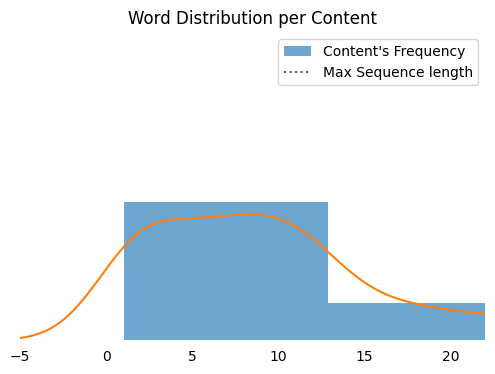

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

data_train['doc_len'].plot(kind='hist',
                      density=True,
                      alpha=0.65,
                      bins=15,
                      label="Content's Frequency")

data_train['doc_len'].plot(kind='kde', label='')

ax.set_xlim(-5, 22)
ax.set_xlabel("")
ax.set_ylim(0, 0.13)
ax.set_yticks([])
ax.set_ylabel("")
ax.set_title("Word Distribution per Content")
ax.grid(False)
ax.axvline(x=max_seq_len, alpha=0.65, color='k', linestyle=':', label='Max Sequence length')
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.legend()
plt.show()

**Tokenize and Pad Sequences**

In [ ]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
#Mengonversi kata-kata menjadi bilangan numerik dengan jumlah kata yang sering muncul sebanyak num_words
tokenizer.fit_on_texts(data_train["stemming"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["stemming"].tolist())
#mengubah kalimat pada data train kolom 'stemming' ke dalam nilai yang sesuai dengan fungsi texts_to_sequences.

train_word_index = tokenizer.word_index #Melihat hasil tokenisasi
print('Found %s unique tokens.' % len(train_word_index))

Found 3096 unique tokens.


In [ ]:
train_cnn_data = pad_sequences(training_sequences, maxlen=max_seq_len)
#Mengubah setiap kalimat pada teks dengan panjang yang sama, dengan panjang maksimal adalah max_seq_len

In [ ]:
test_sequences = tokenizer.texts_to_sequences(data_test["stemming"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=max_seq_len)

**Train Embeddings Weights**

In [ ]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM)) #
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
    #menemukan vektor bobot embedding pada word2vec embedding yang telah disematkan
print(train_embedding_weights.shape)

(3097, 300)


**Word Contextualized Embedding Using IndoBERT**

In [ ]:
# Memnggil model dan tokenizer IndoBERT
#bert_model = TFAutoModel.from_pretrained("indobenchmark/indobert-base-p2", trainable=False)
#bert_tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

In [ ]:
# Pendefinisian fungsi untuk melakukan tokenisasi pada satu data
#def tokenisasi(teks):
      #encode_dict = bert_tokenizer(teks,
                                   #add_special_tokens = True,
                                   #max_length = 128, #maximum token per kalimat = 125
                                   #padding = 'max_length',
                                   #truncation = True,
                                   #return_attention_mask = True,
                                   #return_tensors = 'tf',)

      #tokenID = encode_dict['input_ids']
      #attention_mask = encode_dict['attention_mask']

      #return tokenID, attention_mask


# Pendefinisian fungsi untuk mengambil hasil tokenisasi pada semua data
#def create_input(data):
    #tokenID, input_mask = [], []
    #for teks in data:
        #token, mask = tokenisasi(teks)
        #tokenID.append(token)
        #input_mask.append(mask)

    #return [np.asarray(tokenID, dtype=np.int32).reshape(-1, 128),
            #np.asarray(input_mask, dtype=np.int32).reshape(-1, 128)]

In [ ]:
#bert_label = result_clean.drop(['sentimen'], axis=1)
#data_train_bert, data_test_bert, label_train_bert, label_test_bert = train_test_split(result_clean, bert_label, test_size=0.2, random_state=42)

#x_train_bert = create_input(data_train_bert)
#x_test_bert = create_input(data_test_bert)

#print(result_clean.shape)
#print(bert_label.shape)

#print(x_train_bert[0].shape, x_train_bert[1].shape, label_train_bert.shape)
#print(x_test_bert[0].shape, x_test_bert[1].shape, label_test_bert.shape)

In [ ]:
#Input layer
#input_token = keras.layers.Input(shape=(128,), dtype=np.int32,name="input_token")
#input_mask = keras.layers.Input(shape=(128,), dtype=np.int32,name="input_mask")

#print(input_token)
# Embedding
#bert_embedding = bert_model([input_token, input_mask])[0]

**Define CNN**

Hyperparamater CNN

In [ ]:
learning_rate= 0.001
batch_size  = 64
num_epochs  = 50
num_filters = 256
filter_size = 3

In [ ]:
nb_words = len(train_word_index)
nb_words

3096

In [ ]:
label_names = ['positive','negative']
num_classes = len(label_names)

In [ ]:
target = []

for i in data_train['sentimen']:
  if i == 0:
    target.append(0)
  elif i == 1:
    target.append(1)

data_train['new_label'] = target

train_labels = to_categorical(data_train['new_label'])

In [ ]:
early_stopping = EarlyStopping(monitor='loss',
                               min_delta=0.01,
                               patience=3,
                               verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              patience=6,
                              factor=0.1,
                              verbose=2)
mcp = ModelCheckpoint(filepath = 'cnn_model_wights.h5',
                      monitor = 'val_categorical_accuracy',
                      save_best_only = True,
                      verbose = 1)

callbacks_list = [early_stopping, reduce_lr, mcp]

Model CNN

In [ ]:
model = Sequential(name='model')

model.add(Embedding(nb_words+1, EMBEDDING_DIM,
                    weights=[train_embedding_weights],
                    input_length=max_seq_len,
                    trainable=False))

model.add(Conv1D(num_filters, filter_size, activation='relu', padding='same', strides=1))
model.add(AveragePooling1D(2))
model.add(Dropout(0.3))


model.add(Conv1D(num_filters, filter_size, activation='relu', padding='same', strides=1))
model.add(AveragePooling1D(2))
model.add(Dropout(0.3))

model.add(GlobalAveragePooling1D())
model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dense(num_classes, activation='softmax'))


adam = tf.optimizers.Adam(learning_rate)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 180, 300)          929100    
                                                                 
 conv1d (Conv1D)             (None, 180, 256)          230656    
                                                                 
 average_pooling1d (Average  (None, 90, 256)           0         
 Pooling1D)                                                      
                                                                 
 dropout (Dropout)           (None, 90, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 256)           196864    
                                                                 
 average_pooling1d_1 (Avera  (None, 45, 256)           0         
 gePooling1D)                                                

**Train CNN**

In [ ]:
hist = model.fit(train_cnn_data, train_labels, batch_size = batch_size, epochs = num_epochs, validation_split=0.2, callbacks = callbacks_list, shuffle=True, verbose=2)

Epoch 1/50

Epoch 1: val_categorical_accuracy improved from -inf to 0.88925, saving model to cnn_model_wights.h5
78/78 - 37s - loss: 0.3756 - categorical_accuracy: 0.8988 - val_loss: 0.3497 - val_categorical_accuracy: 0.8892 - lr: 0.0010 - 37s/epoch - 477ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_categorical_accuracy did not improve from 0.88925
78/78 - 32s - loss: 0.3080 - categorical_accuracy: 0.8996 - val_loss: 0.3305 - val_categorical_accuracy: 0.8892 - lr: 0.0010 - 32s/epoch - 416ms/step
Epoch 3/50

Epoch 3: val_categorical_accuracy did not improve from 0.88925
78/78 - 34s - loss: 0.2899 - categorical_accuracy: 0.8998 - val_loss: 0.3112 - val_categorical_accuracy: 0.8892 - lr: 0.0010 - 34s/epoch - 435ms/step
Epoch 4/50

Epoch 4: val_categorical_accuracy did not improve from 0.88925
78/78 - 32s - loss: 0.2785 - categorical_accuracy: 0.8998 - val_loss: 0.2897 - val_categorical_accuracy: 0.8892 - lr: 0.0010 - 32s/epoch - 413ms/step
Epoch 5/50

Epoch 5: val_categorical_accuracy did not improve from 0.88925
78/78 - 34s - loss: 0.2655 - categorical_accuracy: 0.8998 - val_loss: 0.2813 - val_categorical_accuracy: 0.8892 - lr: 0.0010 - 34s/epoch - 439ms/step
Epoch 6/50

Epoch 6: val_categorical_accuracy improved from 0.88925 to 0.89246, saving model to cnn_model_wight

**Test CNN**

In [ ]:
y_pred = model.predict(test_cnn_data, batch_size=32)

49/49 [==============================] - 3s 63ms/step


In [ ]:
labels = [1, 0]

In [ ]:
prediction_labels=[]
for p in y_pred:
    prediction_labels.append(labels[np.argmax(p)])

In [ ]:
sum(data_test.sentimen==prediction_labels)/len(prediction_labels)

0.06546854942233633

In [ ]:
target_test = []

for i in data_test['sentimen']:
  if i == 0:
    target_test.append(0)
  elif i == 1:
    target_test.append(1)

data_test['new_label'] = target_test

test_labels = to_categorical(data_test['new_label'])

In [ ]:
y_test = data_test['sentimen']

y_pred = model.predict(test_cnn_data).round()
pred_df = pd.DataFrame(data=y_pred)
y_pred = pred_df.values.argmax(1)
pred_df.count()

49/49 [==============================] - 3s 69ms/step


0    1558
1    1558
dtype: int64

**EVALUATION**

In [ ]:
train_loss, train_accuracy = model.evaluate(train_cnn_data,train_labels)
test_loss, test_accuracy = model.evaluate(test_cnn_data, test_labels)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

49/49 [==============================] - 4s 89ms/step - loss: 0.1958 - categorical_accuracy: 0.9345
Training Accuracy: 0.9342
Training Loss: 0.1731
Testing Accuracy: 0.9345
Testing Loss: 0.1958


              precision    recall  f1-score   support

           0   0.759259  0.518987  0.616541       158
           1   0.947586  0.981429  0.964211      1400

    accuracy                       0.934531      1558
   macro avg   0.853423  0.750208  0.790376      1558
weighted avg   0.928488  0.934531  0.928953      1558



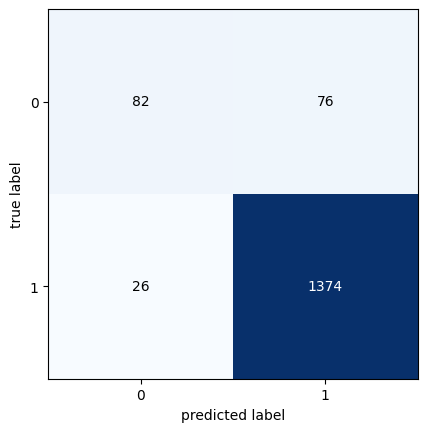

In [ ]:
print(classification_report(y_test, y_pred, digits= 6))

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

**Upload Predicted Files to Google Drive**

In [ ]:
predict = pd.DataFrame(columns=['text'] + ['label'] + ['predict'])
predict['text'] = data_test['stemming']
predict['label'] = y_test
predict['predict'] = y_pred
predict_all_negatif = predict[(predict['label'] == 0) & (predict['predict'] == 0)]

In [ ]:
predict_all_negatif.to_csv('Negatif_to_Negatif.csv')
!cp Negatif_to_Negatif.csv "/content/drive/MyDrive/Bismillah TA"

In [ ]:
predict = pd.DataFrame(columns=['text'] + ['label'] + ['predict'])
predict['text'] = data_test['stemming']
predict['label'] = y_test
predict['predict'] = y_pred
predict

,text,label,predict
324,bayar menggadaikan bumi bangun aplikasi solo d...,1,1
194,malar boss,1,1
322,ada aplikasi solo destination manja warga solo...,1,1
106,bukan_main,1,1
101,aplikasi keren punya solo destination buru dii...,1,1
...,...,...,...
717,aplikasi guna mirip sekali mantap buat goblok ...,1,1
163,good,1,1
321,Charles_Herbert_Best ever indonesia,1,1
259,aplikasi cenderung warga solo kuyy,1,1


In [ ]:
predict['label'].value_counts()

label
1    1400
0     158
Name: count, dtype: int64

In [ ]:
predict = pd.DataFrame(columns=['text'] + ['label'] + ['predict'])
predict['text'] = data_test['stemming']
predict['label'] = y_test
predict['predict'] = y_pred
predict[(predict['label'] == 1) & (predict['predict'] == 1)]

,text,label,predict
324,bayar menggadaikan bumi bangun aplikasi solo d...,1,1
194,malar boss,1,1
322,ada aplikasi solo destination manja warga solo...,1,1
106,bukan_main,1,1
101,aplikasi keren punya solo destination buru dii...,1,1
...,...,...,...
717,aplikasi guna mirip sekali mantap buat goblok ...,1,1
163,good,1,1
321,Charles_Herbert_Best ever indonesia,1,1
259,aplikasi cenderung warga solo kuyy,1,1


In [ ]:
predict.to_csv('Positif_to_Positif.csv')
!cp Positif_to_Positif.csv "/content/drive/MyDrive/Bismillah TA"

In [ ]:
predict = pd.DataFrame(columns=['text'] + ['label'] + ['predict'])
predict['text'] = data_test['stemming']
predict['label'] = y_test
predict['predict'] = y_pred
predict_negatif_positif = predict[(predict['label'] == 0) & (predict['predict'] == 1)]

In [ ]:
predict_negatif_positif.to_csv('Negatif_to_Positif.csv')
!cp Negatif_to_Positif.csv "/content/drive/MyDrive/Bismillah TA"

In [ ]:
predict = pd.DataFrame(columns=['text'] + ['label'] + ['predict'])
predict['text'] = data_test['stemming']
predict['label'] = y_test
predict['predict'] = y_pred
positif_to_negatif = predict[(predict['label'] == 1) & (predict['predict'] == 0)]

In [ ]:
positif_to_negatif.to_csv('Positif_to_Negatif.csv')
!cp Positif_to_Negatif.csv "/content/drive/MyDrive/Bismillah TA"

In [ ]:
predict.to_excel('new_predict.xlsx')
!cp new_predict.xlsx '/content/drive/MyDrive/Bismillah TA'

**Loss and Accuracy Visualization**

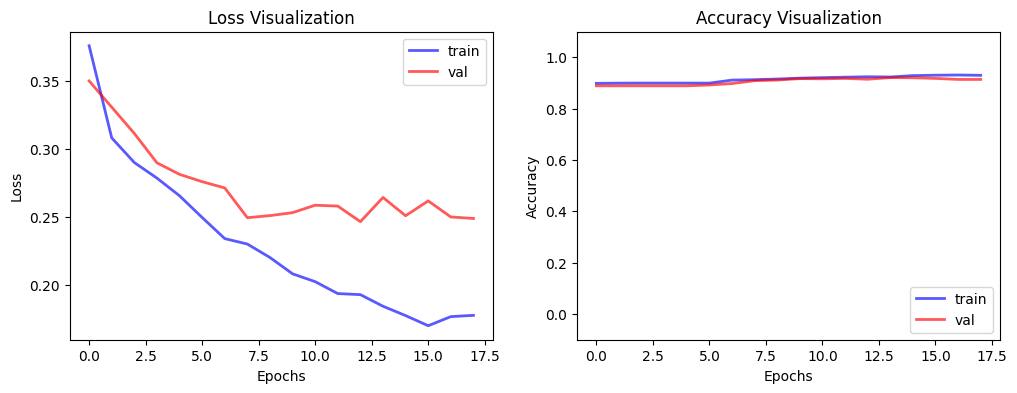

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(hist.history['loss'], lw=2.0, color='b', alpha=0.65, label='train')
ax1.plot(hist.history['val_loss'], lw=2.0, color='r', alpha=0.65, label='val')
ax1.set_title('Loss Visualization')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')
ax2.plot(hist.history['categorical_accuracy'], lw=2.0, color='b', alpha=0.65, label='train')
ax2.plot(hist.history['val_categorical_accuracy'], lw=2.0, color='r', alpha=0.65, label='val')
ax2.set_title('Accuracy Visualization')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

ax1.grid(False)
ax2.grid(False)

ax2.set_ylim(-0.1, 1.1)
plt.show()


**Word Cloud**

In [ ]:
result_positive = result[result['sentimen'] == 1]
result_negative = result[result['sentimen'] == 0]

KeyError: 'sentimen'

In [ ]:
#word cloud positive
it = iter(result_positive['stemming'])
text = [next(it).join(i) for i in result_positive['stemming']]

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#word cloud negative
it = iter(result_negative['stemming'])
text = [next(it).join(i) for i in result_negative['stemming']]

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()